In [1]:
import numpy as np#for numerical calculation, here numpy array is processing
from tensorflow.python.keras.models import Sequential#Sequential uses to pass input layer, hidden layer and output layer
from tensorflow.python.keras.layers import Dense,Activation,Flatten,Dropout#Dense uses to creates layers
#Droput uses to avoid overfitting
#Flatten changes dimesion of the numpy array(1D changes to 2D)
#Activation uses to activation function which gives better accuracy
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
#MaxPooling2D uses to take maximum value over an input window
#Conv2D uses to create a convolutional layer
from tensorflow.python.keras.callbacks import ModelCheckpoint
#callback the model
from tensorflow.python.keras.optimizers import TFOptimizer
#uses to optimize the model. Here uses TFOptimizer. Otherwise uses adam
from tensorflow.python.keras.models import load_model
#load the model to a python file
data=np.load('data.npy')
target=np.load('target.npy')
#load the numpy array data and target

In [2]:
#assign Sequential model into a variable named model
model=Sequential()

#create a convolutional layer
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))#Here 200 convolutional layer
model.add(Activation('relu'))#relu is the activation function
model.add(MaxPooling2D(pool_size=(2,2)))#2x2 maxpooling layer
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split
#data preperation
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
170/170 [==============================] - 475s 3s/step - loss: 0.6415 - accuracy: 0.6456 - val_loss: 0.5563 - val_accuracy: 0.7176
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/5
170/170 [==============================] - 433s 3s/step - loss: 0.5331 - accuracy: 0.7339 - val_loss: 0.4901 - val_accuracy: 0.7640
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/5
170/170 [==============================] - 441s 3s/step - loss: 0.4170 - accuracy: 0.8074 - val_loss: 0.3918 - val_accuracy: 0.8228
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/5
170/170 [==============================] - 441s 3s/step - loss: 0.3118 - accuracy: 0.8661 - val_loss: 0.3414 - val_accuracy: 0.8551
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/5
170/170 [==============================] - 441s 3s/step - loss: 0.2495 - accuracy: 0.8893 - val_loss: 0.3013 - val_accuracy: 0.8868
INFO:tensorflow:Assets written to: model-005.model\assets


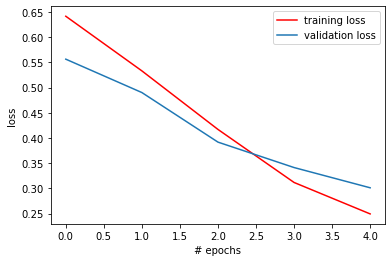

In [5]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

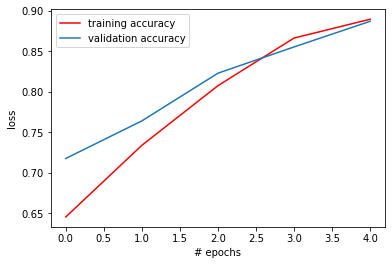

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

